<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## Identify and Analyze Duplicates

### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.

In [3]:
# your code goes here

df.drop('ResponseId',axis=1,inplace=True,errors='ignore')

print('There are', df.duplicated().sum(), 'duplicate rows.')

There are 487 duplicate rows.


In [4]:
## Write your code here
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the first few duplicate rows (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows: 487
First few duplicate rows:
                                              MainBranch                 Age  \
46264                     I am a developer by profession     25-34 years old   
46774                     I am a developer by profession     18-24 years old   
46921                     I am a developer by profession     18-24 years old   
47073  I am not primarily a developer, but I write co...     25-34 years old   
47340                        I code primarily as a hobby  Under 18 years old   

                Employment                            RemoteWork   Check  \
46264  Employed, full-time                                Remote  Apples   
46774  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
46921  Employed, full-time                             In-person  Apples   
47073  Employed, full-time                             In-person  Apples   
47340   Student, full-time                                   NaN  Apples   

      

In [5]:
# Replace 'Prefer not to say' with NaN
df['Age'].replace('Prefer not to say', np.nan, inplace=True)

# Drop rows with NaN values in the Age column
df.dropna(subset=['Age'], inplace=True)

print(df.shape)

(65115, 113)


In [6]:
df.Age.replace({'25-34 years old':30,
                '35-44 years old':40,
                '18-24 years old':20,
                '45-54 years old':50,
                '55-64 years old':60,
                'Under 18 years old':17,
                '65 years or older':70
                },inplace=True)
df['Age']=df['Age'].astype('int')

### Task 2: Analyze Characteristics of Duplicates
1. Identify which columns have the same values in duplicate rows.
2. Analyze the distribution of duplicates across different columns such as Country, Employment, and DevType.

In [7]:
# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]  # keep=False keeps all duplicates

print(f' number of duplciated rows : {len(duplicates)}')
# Show columns in duplicates
print("Columns with same values in duplicate rows:")
duplicate_columns = duplicates.columns
print(duplicate_columns)

 number of duplciated rows : 618
Columns with same values in duplicate rows:
Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=113)


In [8]:
# Group by 'Country', 'Employment', and 'DevType' and count duplicates
duplicates_distribution = df[df.duplicated(keep=False)].groupby(['Country', 'Employment', 'DevType']).size().reset_index(name='duplicate_count')

# Display the distribution of duplicates across these columns
print("Distribution of duplicates across 'Country', 'Employment', and 'DevType':")
print(duplicates_distribution)

Distribution of duplicates across 'Country', 'Employment', and 'DevType':
Empty DataFrame
Columns: [Country, Employment, DevType, duplicate_count]
Index: []


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.

#### Imputing missing values

In [9]:
# your code goes here

print('\n\nThere are', df['Employment'].nunique(), 'unique Employment values in the survey:')

print('\nEmployment        value count')
print('----------        -----------')
print(df['Employment'].value_counts())



There are 110 unique Employment values in the survey:

Employment        value count
----------        -----------
Employment
Employed, full-time                                                                                                                                  38970
Independent contractor, freelancer, or self-employed                                                                                                  4817
Student, full-time                                                                                                                                    4664
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3547
Not employed, but looking for work                                                                                                                    2322
                                                                                                 

#### Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.

In [10]:
df['EdLevel'].fillna(df['EdLevel'].value_counts().idxmax(), inplace=True)

In [11]:
print('\nValue counts for missing data in EdLevel:\n')

print(df['EdLevel'].value_counts())


Value counts for missing data in EdLevel:

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29492
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15518
Some college/university study without earning a degree                                 7632
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5757
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2937
Associate degree (A.A., A.S., etc.)                                                    1788
Primary/elementary school                                                              1125
Something else                                                                          866
Name: count, dtype: int64


### Step 6: Normalizing Compensation Data

**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.

In [12]:
## Write your code here
missing_values = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in 'ConvertedCompYearly': {missing_values}")

# Option 1: Fill missing values with the median of 'ConvertedCompYearly'
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

# Step 3: Check again for missing values after handling them
missing_values_after = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values after handling: {missing_values_after}")

Missing values in 'ConvertedCompYearly': 41689
Missing values after handling: 0


##### Visualize missing values using a heatmap (Using seaborn library).

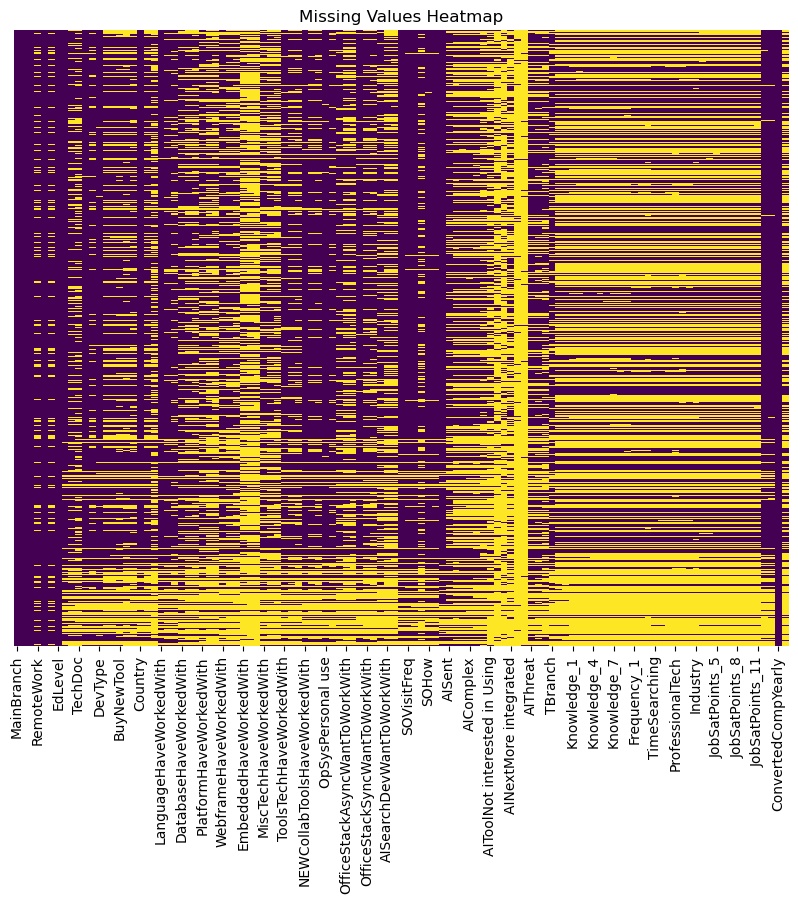

In [13]:
## Write your code here

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).

In [14]:
## Write your code here

def missing_value(df):
    return df.isnull().sum().to_frame('missing_values')

missing_data=missing_value(df)
missing_data

,missing_values
MainBranch,0
Age,0
Employment,0
RemoteWork,10430
Check,0
...,...
JobSatPoints_11,35721
SurveyLength,9180
SurveyEase,9125
ConvertedCompYearly,0


In [15]:
## Write your code here
missing_data.loc['Employment',:]

missing_values    0
Name: Employment, dtype: int64

### Imputing Missing Values
##### Identify the most frequent (majority) value in a specific column (e.g., `Employment`).

In [16]:
## Write your code here
print(df['Employment'].value_counts().idxmax())

Employed, full-time


##### Impute missing values in the `Employment` column with the most frequent value.

In [17]:
## Write your code here
df['Employment'].fillna(df['Employment'].value_counts().idxmax(),inplace=True)

### Visualizing Imputed Data
##### Visualize the distribution of a column after imputation (e.g., `Employment`).

In [18]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                  38970
Independent contractor, freelancer, or self-employed                                                                                                  4817
Student, full-time                                                                                                                                    4664
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3547
Not employed, but looking for work                                                                                                                    2322
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

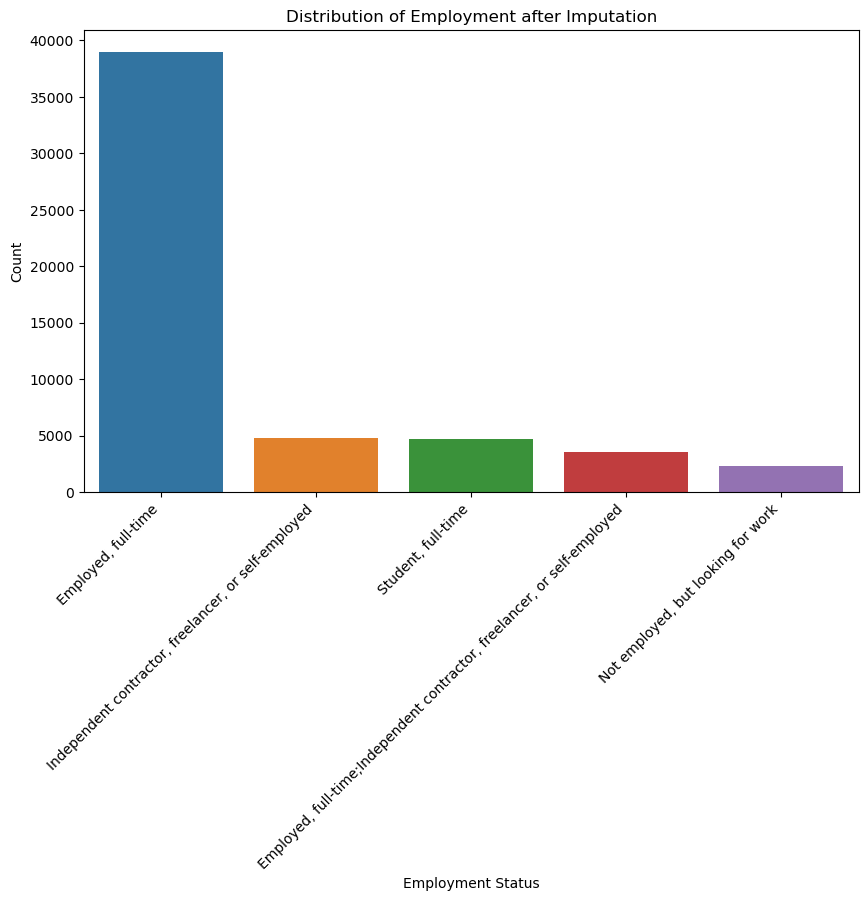

In [19]:

# Option 1: Using a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
employment_counts = df['Employment'].value_counts().sort_values(ascending=False)

employment_counts=employment_counts.head()

sns.barplot(x=employment_counts.index, y=employment_counts.values)
plt.title('Distribution of Employment after Imputation')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

### Imputing Missing Values
##### Find the value counts for the column RemoteWork.

In [20]:
## Write your code here

df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    22975
Remote                                  20774
In-person                               10936
Name: count, dtype: int64

##### Identify the most frequent (majority) value in the RemoteWork column.

In [21]:
## Write your code here
print(df['RemoteWork'].value_counts().idxmax())

Hybrid (some remote, some in-person)


##### Impute (replace) all the empty rows in the column RemoteWork with the majority value.

In [22]:
## Write your code here
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].value_counts().idxmax())

##### Check for any compensation-related columns and describe their distribution.

##### Impute missing values in CodingActivities with forward-fill.

In [23]:
## Write your code here# Forward-fill missing values in 'CodingActivities'
df['CodingActivities'] = df['CodingActivities'].ffill()
df['CodingActivities'].value_counts()

CodingActivities
Hobby                                                                                                                                                                              11920
I don’t code outside of work                                                                                                                                                        7739
Hobby;Professional development or self-paced learning from online courses                                                                                                           7373
Hobby;Contribute to open-source projects                                                                                                                                            4448
Professional development or self-paced learning from online courses                                                                                                                 3711
                                                          

### Normalizing Compensation Data
##### Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [24]:
## Write your code here

# Step 1: Display column names to identify compensation-related columns
print(df.columns)

# Step 2: Check if 'ConvertedCompYearly' exists
if 'ConvertedCompYearly' in df.columns:

    print("Column 'ConvertedCompYearly' found!")
    # Step 3: Check for missing values in 'ConvertedCompYearly'
    missing_values = df['ConvertedCompYearly'].isnull().sum()
    print(f"Missing values in 'ConvertedCompYearly': {missing_values}")

    # Step 4: Handle missing values (if necessary)
    # Example: Drop rows with missing compensation values
    df = df.dropna(subset=['ConvertedCompYearly'])

    # Step 5: Ensure the column is numeric
    df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

    # Final Output: Verify the data
    print(df['ConvertedCompYearly'].describe())

else:
    print("Column 'ConvertedCompYearly' not found. Please inspect the dataset for other compensation-related columns.")

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=113)
Column 'ConvertedCompYearly' found!
Missing values in 'ConvertedCompYearly': 0
count    6.511500e+04
mean     7.260270e+04
std      1.124917e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


##### Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.

In [25]:
## Write your code here
from sklearn.preprocessing import MinMaxScaler

# Step 1: Ensure 'ConvertedCompYearly' is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 2: Drop rows with missing 'ConvertedCompYearly' values
df = df.dropna(subset=['ConvertedCompYearly'])

# Step 3: Initialize MinMaxScaler
scaler = MinMaxScaler()

# Step 4: Apply Min-Max Scaling and create a new column
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Step 5: Verify the results
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())


   ConvertedCompYearly  ConvertedCompYearly_MinMax
0              65000.0                    0.003998
1              65000.0                    0.003998
2              65000.0                    0.003998
3              65000.0                    0.003998
4              65000.0                    0.003998


##### Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.

In [26]:
## Write your code here

# Step 1: Ensure 'ConvertedCompYearly' is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 2: Drop rows with missing 'ConvertedCompYearly' values
df = df.dropna(subset=['ConvertedCompYearly'])

# Step 3: Calculate Z-score normalization
mean_value = df['ConvertedCompYearly'].mean()
std_dev = df['ConvertedCompYearly'].std()

df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_value) / std_dev

# Step 4: Verify the results
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0              65000.0                   -0.067585
1              65000.0                   -0.067585
2              65000.0                   -0.067585
3              65000.0                   -0.067585
4              65000.0                   -0.067585


### Visualization of Normalized Data
##### Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.

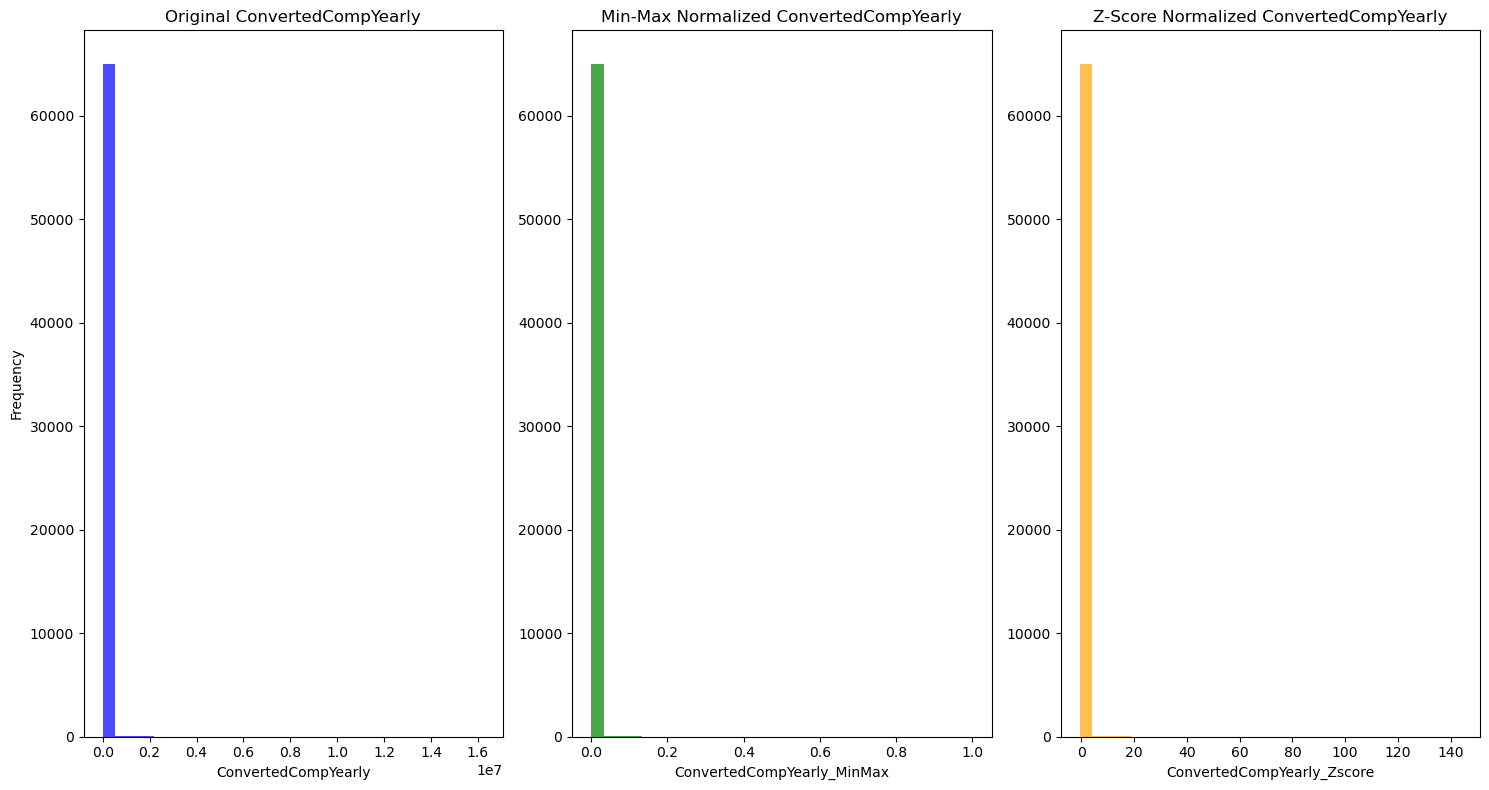

In [27]:
## Write your code here

import matplotlib.pyplot as plt

# Create histograms for the distributions of the original and normalized columns
plt.figure(figsize=(15, 8))

# Histogram for ConvertedCompYearly (Original)
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=30, color='blue', alpha=0.7)
plt.title('Original ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Histogram for ConvertedCompYearly_MinMax
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=30, color='green', alpha=0.7)
plt.title('Min-Max Normalized ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly_MinMax')

# Histogram for ConvertedCompYearly_Zscore
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=30, color='orange', alpha=0.7)
plt.title('Z-Score Normalized ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly_Zscore')

# Display the plots
plt.tight_layout()
plt.show()

<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [28]:
# Write your code here

def missing_value(df):
    return df.isnull().sum().to_frame('missing_values')

missing_data=missing_value(df)
missing_data

,missing_values
MainBranch,0
Age,0
Employment,0
RemoteWork,0
Check,0
...,...
SurveyEase,9125
ConvertedCompYearly,0
JobSat,36037
ConvertedCompYearly_MinMax,0


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [29]:
# Write your code here
df.describe()

,Age,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore
count,65115.000000,3.372600e+04,29611.000000,29273.000000,29342.000000,29361.000000,29399.000000,29397.000000,29405.000000,29405.000000,29399.000000,29394.000000,6.511500e+04,29078.000000,65115.000000,6.511500e+04
mean,33.196898,2.965071e+145,11.450204,18.588939,7.529488,10.069544,24.364134,22.981012,20.292081,16.178738,10.968698,9.962441,7.260270e+04,6.935209,0.004466,5.412412e-17
std,11.575526,5.445247e+147,9.149328,25.974073,18.435003,21.846880,27.100750,27.027534,26.118117,24.853369,22.922295,21.788733,1.124917e+05,2.087668,0.006920,1.000000e+00
min,17.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,-6.453963e-01
25%,20.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000e+04,6.000000,0.003998,-6.758460e-02
50%,30.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000,0.003998,-6.758460e-02
75%,40.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,6.500000e+04,8.000000,0.003998,-6.758460e-02
max,70.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000,1.000000,1.438685e+02


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [30]:

# 1. Standardize 'Country' column
country_mapping = {
    'United States': 'US',
    'United States of America': 'US',
    'U.S.A.': 'US',
    'USA': 'US',
    'United Kingdom': 'UK',
    'Great Britain': 'UK',
    # Add more mappings as needed
}

df['Country'] = df['Country'].map(country_mapping).fillna(df['Country'])


# 2. Standardize 'EdLevel' column
edlevel_mapping = {
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor's degree",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Master's degree",
    "Some college/university study without earning a degree": "Some college",
    # Add more mappings as needed
}

df['EdLevel'] = df['EdLevel'].map(edlevel_mapping).fillna(df['EdLevel'])


### 4. Encoding Categorical Variables


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [31]:

# 1. Impute with mean
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].mean(), inplace=True)



<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


### 6. Feature Scaling and Transformation


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [33]:
df.to_csv("../survey-data.csv")

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
